## Background

This exercise is to help banks predict whether a person will experience financial distress in the next two years. The business goal is to determine whether the banks should grant a person a loan by a predictive model. In context, granting a loan to someone who will not be able to repay would translate into huge loss for the banks. It is crucial for the banks to predict delinquency before approving a loan to lower risks of granting uncollectible loans.

## Import libraries

In [1]:
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

## Load datasets

In [2]:
train_df = pd.read_csv('cs-training.csv')

In [3]:
test_df = pd.read_csv('cs-test.csv')

## Exploratory data analysis

Understand the datasets from high level

In [4]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


Check column labels

In [6]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
test_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

As the first column label is Unnamed and it is known that each record refers to a borrower, I'd rename the column label to 'Id' and set it to index for easier referencing

In [8]:
train_df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [9]:
train_df.set_index('Id',inplace=True)

In [10]:
test_df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [11]:
test_df.set_index('Id',inplace=True)

In [12]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [13]:
test_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

After checking and cleaning the labels, we know that test and train datasets could be combined for EDA.

### Combine train and test datasets for EDA

In [14]:
combined_df = pd.concat([train_df,test_df])

Get brief info of the data

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 2   age                                   251503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 4   DebtRatio                             251503 non-null  float64
 5   MonthlyIncome                         201669 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 7   NumberOfTimes90DaysLate               251503 non-null  int64  
 8   NumberRealEstateLoansOrLines          251503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 10  NumberOfDependents                    244953 non-null  float64
dtype

In [16]:
combined_df.nunique(axis=0)

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    208075
age                                         88
NumberOfTime30-59DaysPastDueNotWorse        17
DebtRatio                               182595
MonthlyIncome                            15757
NumberOfOpenCreditLinesAndLoans             60
NumberOfTimes90DaysLate                     21
NumberRealEstateLoansOrLines                29
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          14
dtype: int64

In [17]:
combined_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,0.066840,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,0.249746,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


In [18]:
combined_df.shape

(251503, 11)

### High-level Observations

For the combined dataset:
- There are 11 features and 251503 rows
- All datatypes are numerical data, some are *int* and some are *float*. *SeriousDlqin2yrs* can be considered as categorical since we know from the data dictionary that it is of boolean type and unique non-null values are 1 and 0
- There are null values in two features: *MonthlyIncome* and *NumberOfDependents*, they would require further handling of missing data. ~20% of *MonthlyIncome* and ~3% of *NumberOfDependents* are null
- There seem to have significantly extreme numbers for features *RevolvingUtilizationOfUnsecuredLines* and *DebtRatio*, which we know from data dictionary that these numbers are percentages. I'd look out for outliers in the following steps

### Check for class imbalance on the target variable

Since the data is already split into test and train sets, we could see from above that the target variable, *SeriousDlqin2yrs* data is empty in test dataset. Therefore, assuming we'd use the datasets split by Kaggle in this exercise, I'd check for class imbalance in the train dataset.

In [19]:
train_df['SeriousDlqin2yrs'].unique()

array([1, 0])

In [20]:
train_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


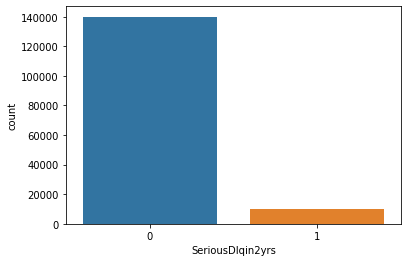

In [21]:
sns.countplot(train_df['SeriousDlqin2yrs'])

In [22]:
perc_of_delinquency = train_df[train_df['SeriousDlqin2yrs']==1]['SeriousDlqin2yrs'].count()/train_df['SeriousDlqin2yrs'].count()*100

In [23]:
print('% of delinquency: ',perc_of_delinquency,'%')

% of delinquency:  6.683999999999999 %


From the train dataset, it is important to note that the data is highly imbalanced. The number of negatives far exceeds that of positives where % of positives is only around 6.68%. Negative to positive class ratio is 14:1. This would likely lead to low accuracy in predicting serious delinquency for this problem set if not tackled.

### Missing data

To further understanding distribution of missing data, below is a simple heatmap for visualization.

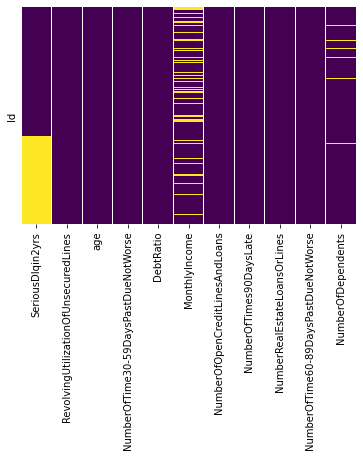

In [24]:
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For the missing values in *MonthlyIncome*, it's possible that null values refer to zero. Therefore, I'd check whether this assumption makes sense by checking the count of null values versus zero.

In [25]:
combined_df[combined_df['MonthlyIncome'].isnull()].shape[0]

49834

In [26]:
combined_df[combined_df['MonthlyIncome']==0].shape[0]

2654

Given the above shows that there is a considerable number of records with zero's, and this piece of information should have been crucial for banks to approve loans, it is very unlikely that the missing data represents zero.

Similarly based on the same assumption, I'd check for *NumberOfDependents*

In [27]:
combined_df[combined_df['NumberOfDependents'].isnull()].shape[0]

6550

In [28]:
combined_df[combined_df['NumberOfDependents']==0].shape[0]

145520

Similar observation applies to *NumberOfDependents* as well.

With 20% and 3% of missing data for *MonthlyIncome* and *NumberOfDependents* respectively, it is acceptable to fill these in with some imputation when preparing the data.

### Univariate analysis of features using distribution plot

Overview of all features with simple distribution plots

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


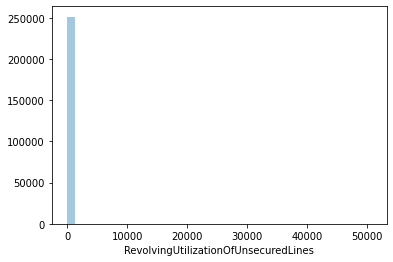

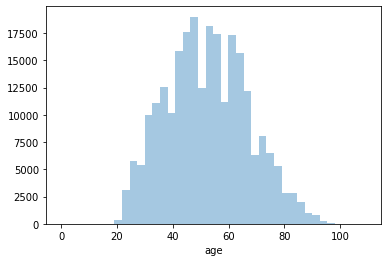

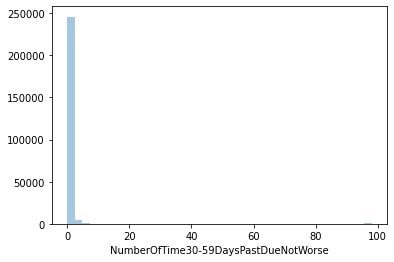

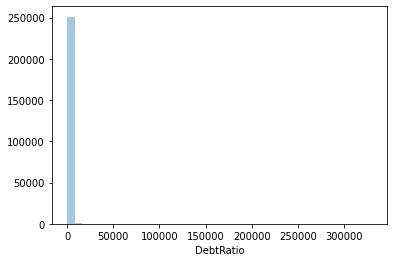

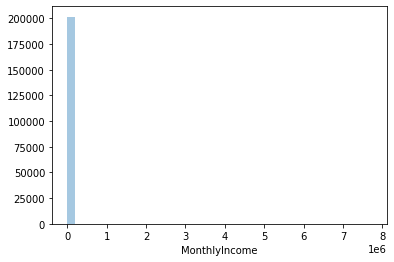

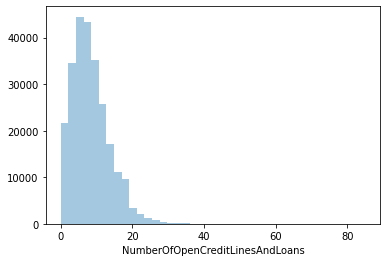

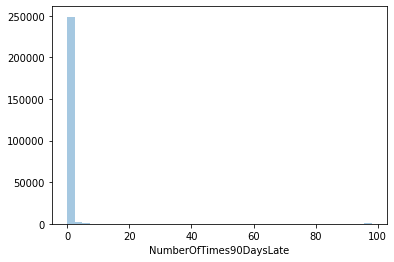

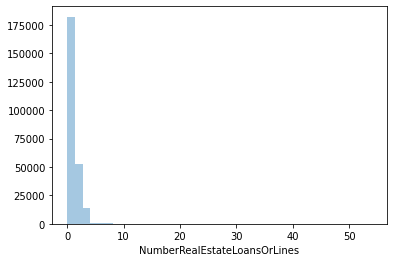

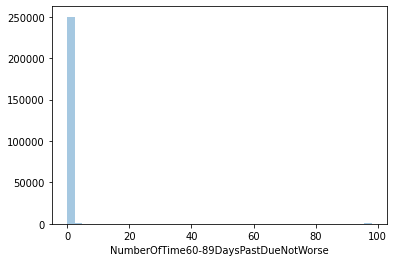

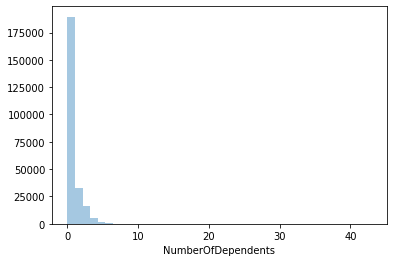

In [29]:
for column in combined_df.columns[1:]:
    sns.distplot(combined_df[column].dropna(),kde=False,bins=40)
    plt.show()

Insights:
- Majority of the borrower records here are between age 40-60, all within range of 0 to 109. It looks to be normally distributed
- Majority of these borrowers have 5-11 open credit lines and loans, but some are really extreme to have at most 85 open credit lines.The data is skewed.
- Most of them have 0-2 real estate loans, some extreme cases have up to 54 real estate loans. The data is also skewed.
- It looks like, apart from high skewness, no other significant insights can be drawn from the info and charts above, we'd need to take a deeper look for the rest of features below

#### Number of Dependents

In [30]:
combined_df['NumberOfDependents'].dropna().value_counts().sort_index()

0.0     145520
1.0      43934
2.0      32820
3.0      16106
4.0       4857
5.0       1272
6.0        283
7.0        101
8.0         40
9.0          8
10.0         8
13.0         1
20.0         2
43.0         1
Name: NumberOfDependents, dtype: int64

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

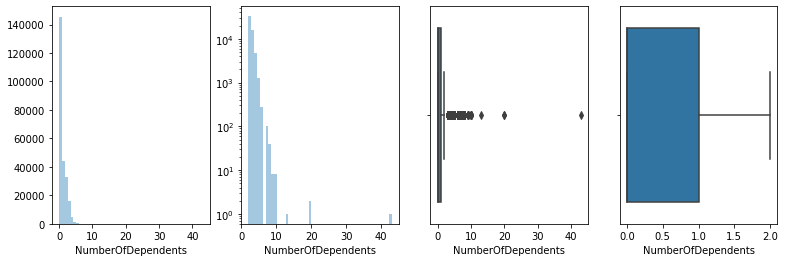

In [31]:
dependents_fig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(combined_df['NumberOfDependents'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['NumberOfDependents'][combined_df['NumberOfDependents'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['NumberOfDependents'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['NumberOfDependents'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [32]:
combined_df[combined_df['NumberOfDependents'].between(0,2.0)].shape[0]/combined_df['NumberOfDependents'].dropna().count()

0.9074148918363931

For the non-null records in *NumberOfDependents*, 91% of the borrowers have 0 to 2 dependent(s). However, we can see that a number of cases that have 10 to 43 dependents.

#### Monthly Income

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

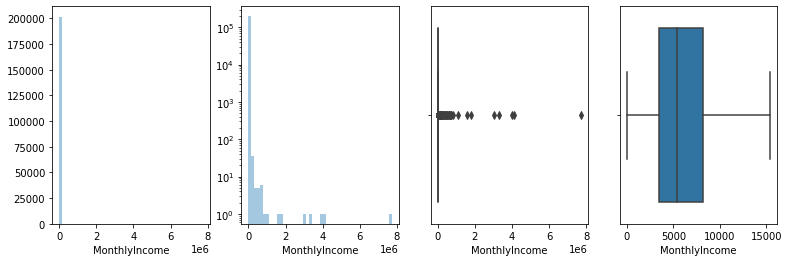

In [33]:
income_fig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(combined_df['MonthlyIncome'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['MonthlyIncome'][combined_df['MonthlyIncome'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['MonthlyIncome'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['MonthlyIncome'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [34]:
combined_df[combined_df['MonthlyIncome'].between(0,15000)].shape[0]/combined_df['MonthlyIncome'].dropna().count()

0.9561608378084882

We could see that 96% of the borrowers have monthly income from 0 to 15000, there are some extreme cases (~4%) where income is much higher than the bulk of others, which is up to 7727000.

#### Revolving Utilization of Unsecured Lines

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

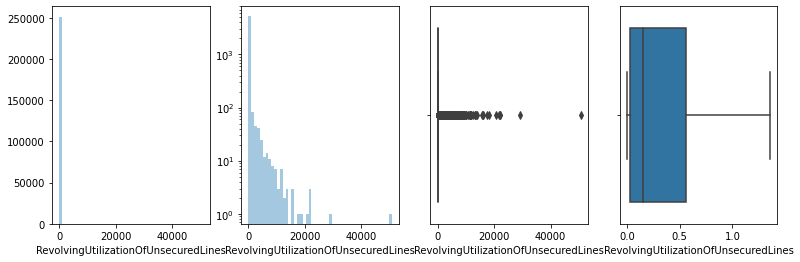

In [35]:
unsecured_lines_fig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(combined_df['RevolvingUtilizationOfUnsecuredLines'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['RevolvingUtilizationOfUnsecuredLines'][combined_df['RevolvingUtilizationOfUnsecuredLines'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['RevolvingUtilizationOfUnsecuredLines'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['RevolvingUtilizationOfUnsecuredLines'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [36]:
combined_df[combined_df['RevolvingUtilizationOfUnsecuredLines']>1].shape[0]/combined_df.shape[0]

0.021876478610593116

There are 2% of borrowers whose spend on credit exceed their total credit limits. Amongst them, some even spend 50708x of their total credit limits.

#### Debt Ratio

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

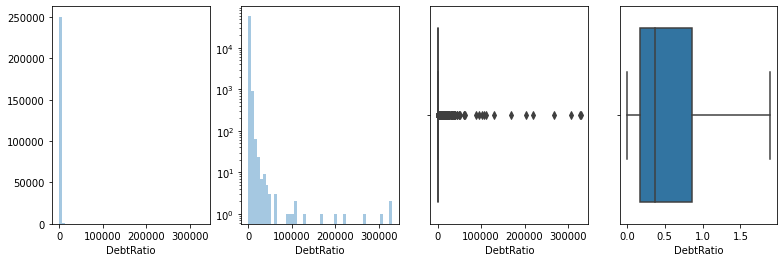

In [37]:
debt_ratio_fig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(combined_df['DebtRatio'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['DebtRatio'][combined_df['DebtRatio'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['DebtRatio'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['DebtRatio'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [38]:
combined_df[combined_df['DebtRatio']>1].shape[0]/combined_df.shape[0]

0.23345645976389945

23% of borrowers have debt amount that is higher than their monthly gross income. Some extreme cases have 329664x of monthly gross income.

#### Number of Times 30-59 Days Past Due but Not Worse

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

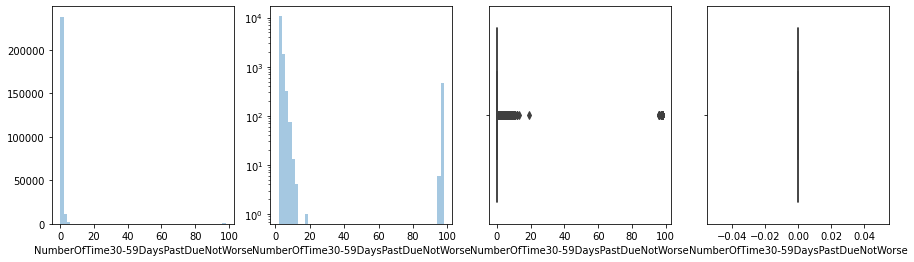

In [39]:
day_30_59_fig, axs = plt.subplots(ncols = 4, figsize=(15, 4))

sns.distplot(combined_df['NumberOfTime30-59DaysPastDueNotWorse'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['NumberOfTime30-59DaysPastDueNotWorse'][combined_df['NumberOfTime30-59DaysPastDueNotWorse'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['NumberOfTime30-59DaysPastDueNotWorse'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['NumberOfTime30-59DaysPastDueNotWorse'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [40]:
not_repaying_30_59 = combined_df[combined_df['NumberOfTime30-59DaysPastDueNotWorse']>0]

In [41]:
not_repaying_30_59.shape[0]/combined_df.shape[0]

0.16021677673824963

In [42]:
print(not_repaying_30_59.shape[0])

40295


In [43]:
not_repaying_30_59['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

1     26870
2      7766
3      2955
4      1257
5       547
6       228
7        96
8        53
9        22
10       11
11        2
12        3
13        1
19        1
96        6
98      477
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

16% of borrowers have experienced having loans 30 to 59 days past due. Amongst these people, over half of them have experienced it once. It is also worth noting that around 1% of them have not repaid within the time frame for 98 times.

#### Number of Times 60-89 Days Past Due but Not Worse

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

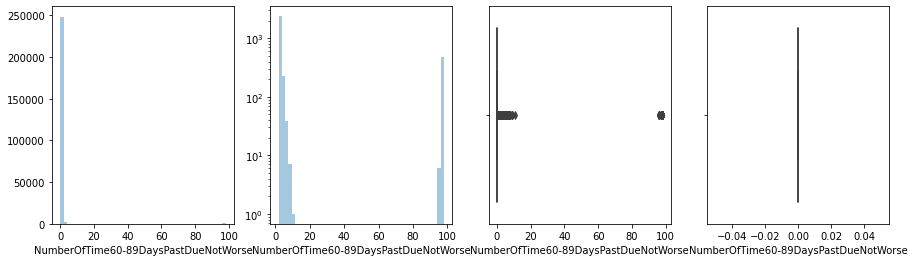

In [44]:
day_60_89_fig, axs = plt.subplots(ncols = 4, figsize=(15, 4))

sns.distplot(combined_df['NumberOfTime60-89DaysPastDueNotWorse'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['NumberOfTime60-89DaysPastDueNotWorse'][combined_df['NumberOfTime60-89DaysPastDueNotWorse'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['NumberOfTime60-89DaysPastDueNotWorse'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['NumberOfTime60-89DaysPastDueNotWorse'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [45]:
not_repaying_60_89 = combined_df[combined_df['NumberOfTime60-89DaysPastDueNotWorse']>0]

In [46]:
not_repaying_60_89.shape[0]/combined_df.shape[0]

0.05062365061251754

In [47]:
print(not_repaying_60_89.shape[0])

12732


In [48]:
not_repaying_60_89['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

1     9594
2     1849
3      534
4      166
5       59
6       23
7       16
8        3
9        4
11       1
96       6
98     477
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

5% of borrowers have experienced having loans 60 to 89 days past due. Amongst these people, majority of them have experienced it once. 4% of them have not repaid within the time period for 98 times.

#### Number of Times 90 Days Late

/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leona/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error 

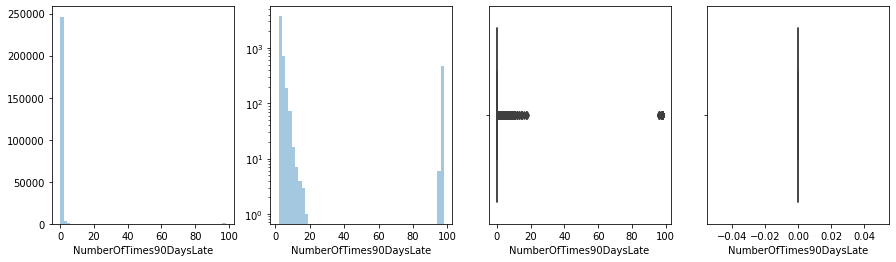

In [49]:
day_90_fig, axs = plt.subplots(ncols = 4, figsize=(15, 4))

sns.distplot(combined_df['NumberOfTimes90DaysLate'], kde=False, ax=axs[0])
second_plt = sns.distplot(combined_df['NumberOfTimes90DaysLate'][combined_df['NumberOfTimes90DaysLate'] > 1], kde=False, ax=axs[1])
second_plt.set_yscale('log')
sns.boxplot(combined_df['NumberOfTimes90DaysLate'], ax=axs[2], orient = 'Vertical')
sns.boxplot(combined_df['NumberOfTimes90DaysLate'], ax=axs[3], orient = 'Vertical', showfliers=False)

In [50]:
not_repaying_90 = combined_df[combined_df['NumberOfTimes90DaysLate']>0]

In [51]:
not_repaying_90.shape[0]/combined_df.shape[0]

0.05588800133596816

In [52]:
print(not_repaying_90.shape[0])

14056


In [53]:
not_repaying_90['NumberOfTimes90DaysLate'].value_counts().sort_index()

1     8837
2     2617
3     1112
4      482
5      233
6      124
7       64
8       40
9       33
10      10
11       6
12       3
13       4
14       2
15       2
16       1
17       2
18       1
96       6
98     477
Name: NumberOfTimes90DaysLate, dtype: int64

6% of borrowers have experienced having loan 90 days or more past due. Amongst these people, majority of them have experienced it once, 3% of them have not repaid within the time period for 98 times.

### Bivariate analysis using correlation heatmap

On train dataset:

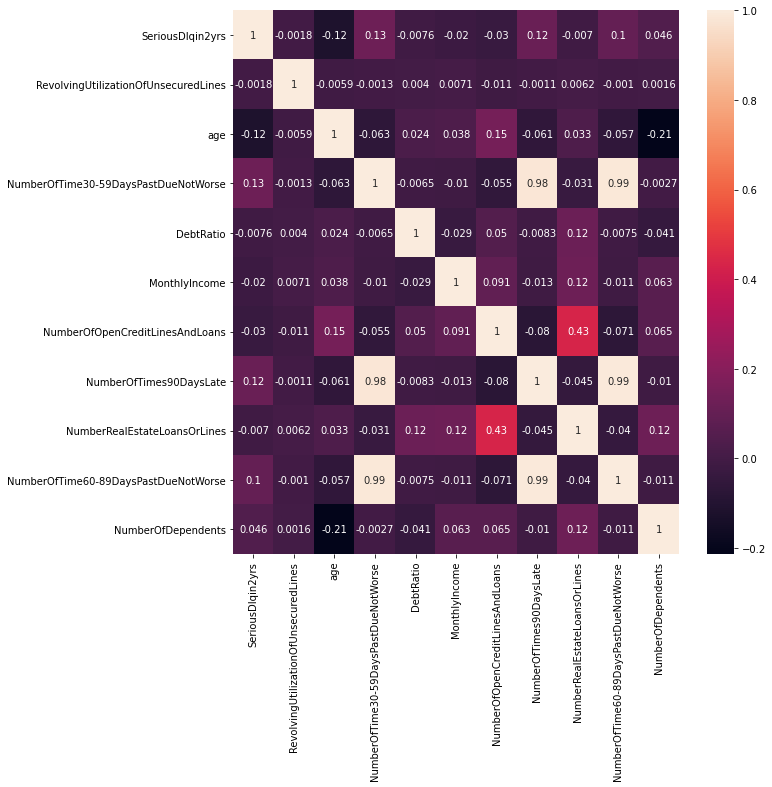

In [54]:
plt.subplots(figsize=(10,10))
corr = train_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

It can be seen that *NumberOfTime30-59DaysPastDueNotWorse*, *NumberOfTimes90DaysLate* and *NumberOfTime60-89DaysPastDueNotWorse* are highly correlated. *NumberOfOpenCreditLinesAndLoans* and *NumberRealEstateLoansOrLines* are somewhat correlated.

### Bivariate analysis using pair plot

In [55]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

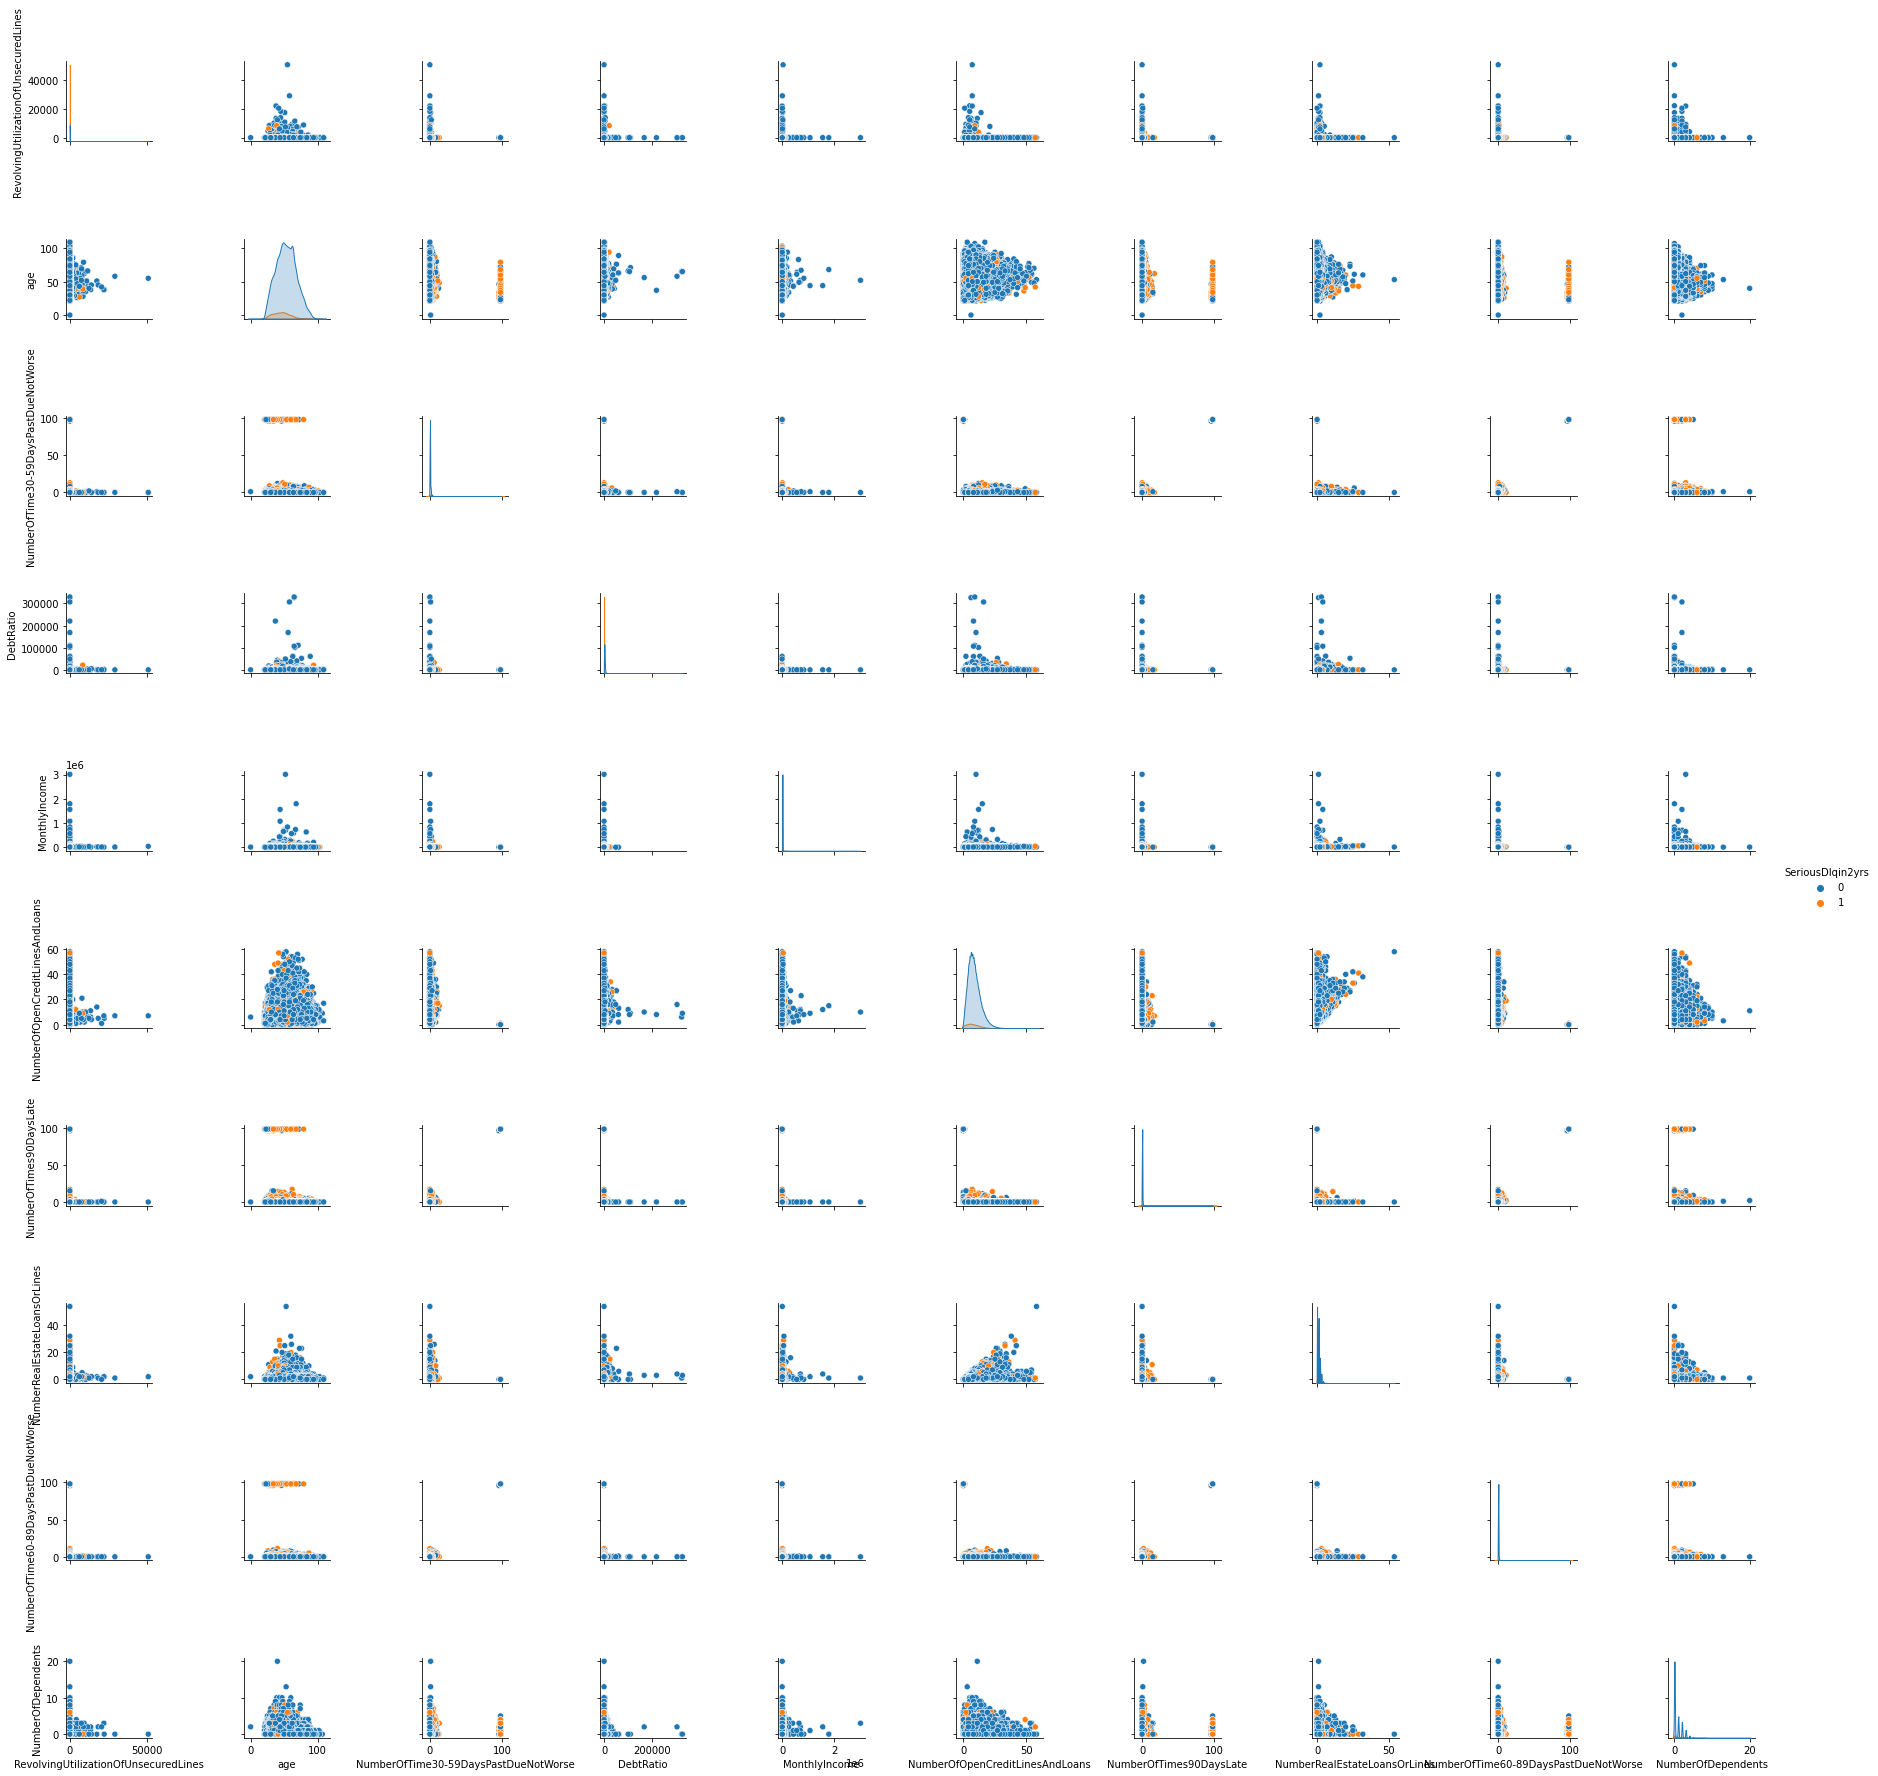

In [56]:
sns.pairplot(train_df,hue='SeriousDlqin2yrs')
plt.show()

### Key summary of data insights

- The target variable in the train dataset is highly imbalanced and needs handling
- There are missing data in *MonthlyIncome* and *NumberOfDependents* that need imputation
- Since our features have different scales, we would benefit from feature scaling
- *NumberOfTime30-59DaysPastDueNotWorse*, *NumberOfTimes90DaysLate* and *NumberOfTime60-89DaysPastDueNotWorse* are highly correlated, we can keep one of them to avoid overfitting. The same goes for *NumberOfOpenCreditLinesAndLoans* and *NumberRealEstateLoansOrLines*

## Build a simple logistic regression model

For this exercise, I'd start by using logistic regression for the first run.

### Preprocessing

As first steps, I would:
- Remove highly correlated features
- Fill in missing values

Then after the first run of model, here are a few things that can be tested further:
- Standardize/normalize data
- Remove outliers
- Undersample the 0's or oversample the 1's in target variable
- Run PCA for dimensionality reduction
- Adjust feature set
- Feature engineering
- Model selection
- Adjust decision threshold
etc.

### Remove unnecessary features

To decide which features to drop, we'd run the correlation against target variable. The feature with the highest correlation would be kept.

In [57]:
corr['SeriousDlqin2yrs'].sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.046048
RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberRealEstateLoansOrLines           -0.007038
DebtRatio                              -0.007602
MonthlyIncome                          -0.019746
NumberOfOpenCreditLinesAndLoans        -0.029669
age                                    -0.115386
Name: SeriousDlqin2yrs, dtype: float64

In [58]:
train_df.drop(columns=['NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','NumberRealEstateLoansOrLines'],axis=1,inplace=True)
test_df.drop(columns=['NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','NumberRealEstateLoansOrLines'],axis=1,inplace=True)

### Fill in missing data

As there are outliers for both features, we will use median to fill the missing values since mean is impacted by outliers.

In [59]:
income_median = combined_df['MonthlyIncome'].median()

In [60]:
train_df['MonthlyIncome'].fillna(income_median,inplace=True)

In [61]:
test_df['MonthlyIncome'].fillna(income_median,inplace=True)

In [62]:
dependents_median = combined_df['NumberOfDependents'].median()

In [63]:
train_df['NumberOfDependents'].fillna(dependents_median,inplace=True)

In [64]:
test_df['NumberOfDependents'].fillna(dependents_median,inplace=True)

### Train and predict with non-standardized data

In [98]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
Id,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0.0


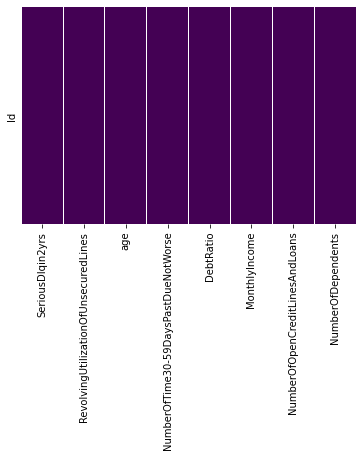

In [99]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [100]:
train = train_df.copy()

In [101]:
X = train.drop('SeriousDlqin2yrs',axis=1)
y = train['SeriousDlqin2yrs']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.30, 
                                                    random_state=101)

Here I will use the class_weight parameter to tackle the imbalanced classes

In [103]:
logmodel = LogisticRegression(max_iter=400,class_weight='balanced')
logmodel.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=400)

In [104]:
y_pred = logmodel.predict(X_test)

### Evaluation

Check precision, recall, f1-score with classification report, accuracy and confusion matrix.

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     41983
           1       0.21      0.49      0.29      3017

    accuracy                           0.84     45000
   macro avg       0.58      0.68      0.60     45000
weighted avg       0.91      0.84      0.87     45000



In [106]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

Training accuracy:  0.8430666666666666
Testing accuracy:  0.8412666666666667
[[36372  5611]
 [ 1532  1485]]


While the accuracy of the model is not bad, there are 1532 cases (~51%) of false negatives. With context, it means that 1532 cases will actually experience financial distress, but our model predicts otherwise. Misclassifying the positive cases would incur high costs to the banks as these borrowers shouldn't be granted for a loan.

### Model with standardized data

In [107]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

logmodel.fit(X_train_std,y_train)

LogisticRegression(class_weight='balanced', max_iter=400)

In [108]:
y_pred = logmodel.predict(X_test_std)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     41983
           1       0.14      0.64      0.23      3017

    accuracy                           0.72     45000
   macro avg       0.55      0.68      0.53     45000
weighted avg       0.91      0.72      0.79     45000



In [110]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

Training accuracy:  0.717152380952381
Testing accuracy:  0.7158444444444444
[[30287 11696]
 [ 1091  1926]]


The accuracy lowered after standardizing the data but the false negative % is reduced to 36% with 1091 cases. This is an improvement in a sense where we focus on predicting positive class accurately.

### Check model coefficients to gauge feature importance

In [115]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logmodel.coef_))], axis = 1)

In [116]:
coefficients.columns = ['Feature','Coefficient']

In [117]:
print(coefficients.sort_values('Coefficient',ascending=False))

                                Feature  Coefficient
2  NumberOfTime30-59DaysPastDueNotWorse     2.682681
6                    NumberOfDependents     0.091687
0  RevolvingUtilizationOfUnsecuredLines    -0.008324
3                             DebtRatio    -0.025852
5       NumberOfOpenCreditLinesAndLoans    -0.045097
4                         MonthlyIncome    -0.266414
1                                   age    -0.449849


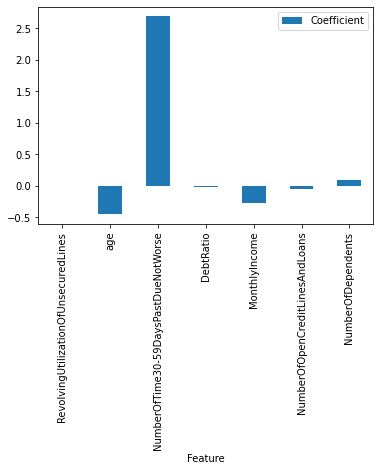

In [118]:
coefficients.plot.bar(x='Feature',y='Coefficient')

Given the data has been standardized, the coefficients are comparable. We can see that *NumberOfTime30-59DaysPastDueNotWorse* have the highest absolute value, therefore it is the most important feature from the model. It is followed by *age* and *MonthlyIncome*. This information would be useful for feature selection or engineering to further enhance the predictive model.